In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model 

h:\Machine Learning\class\env\Lib\site-packages\sklearn\utils\_param_validation.py:14: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  from scipy.sparse import csr_matrix, issparse


In [2]:
df = pd.read_csv('../data/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


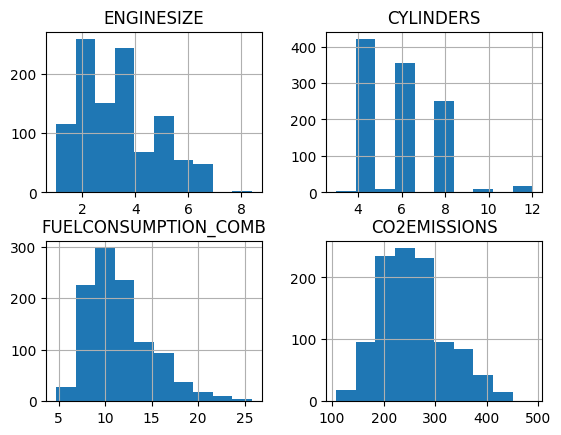

In [5]:
cdf.hist()
plt.show()

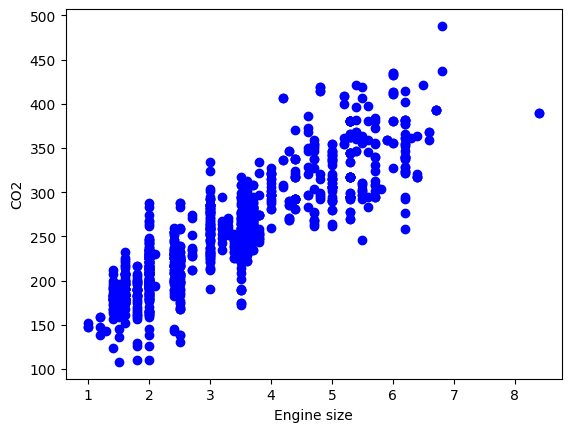

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('CO2')
plt.show()

In [7]:
cdf.FUELCONSUMPTION_COMB[(cdf.CYLINDERS < 8)]

0        8.5
1        9.6
2        5.9
3       11.1
4       10.6
        ... 
1062    11.8
1063    11.5
1064    11.8
1065    11.3
1066    12.8
Name: FUELCONSUMPTION_COMB, Length: 789, dtype: float64

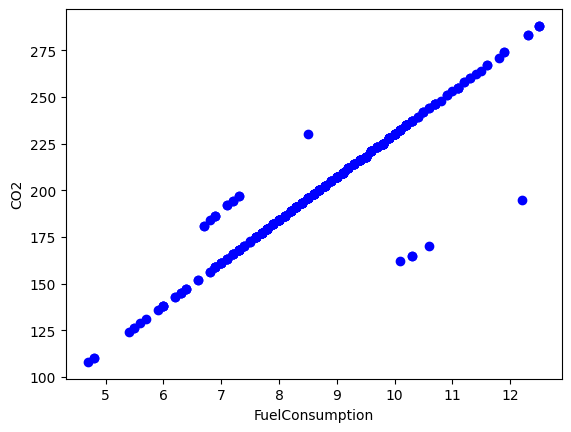

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB[(cdf.CYLINDERS < 6)], cdf.CO2EMISSIONS[(cdf.CYLINDERS < 6)], color='blue')
plt.xlabel('FuelConsumption')
plt.ylabel('CO2')
plt.show()

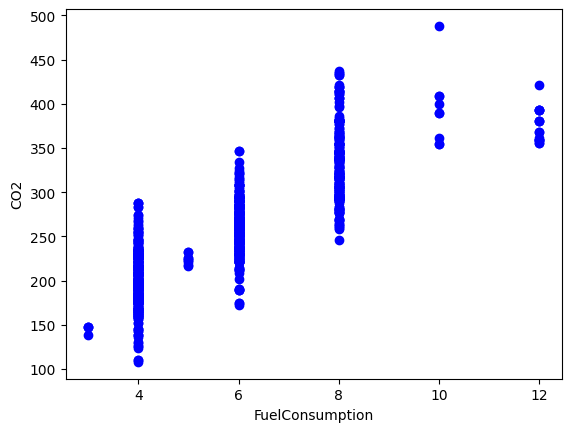

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FuelConsumption')
plt.ylabel('CO2')
plt.show()

# Train and Test splite using numpy

In [10]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

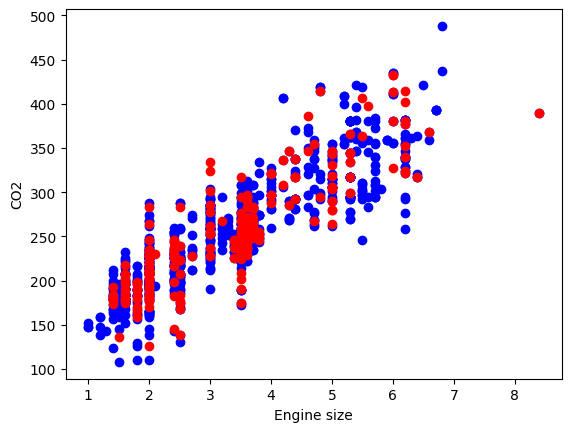

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
ax1.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red')
plt.xlabel('Engine size')
plt.ylabel('CO2')
plt.show()

In [12]:
reg = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE']])
y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(x, y)
print('Coefficients: ' , reg.coef_)
print('Intercept: ' , reg.intercept_)

Coefficients:  [[38.95167965]]
Intercept:  [125.79313291]


Text(0, 0.5, 'CO2')

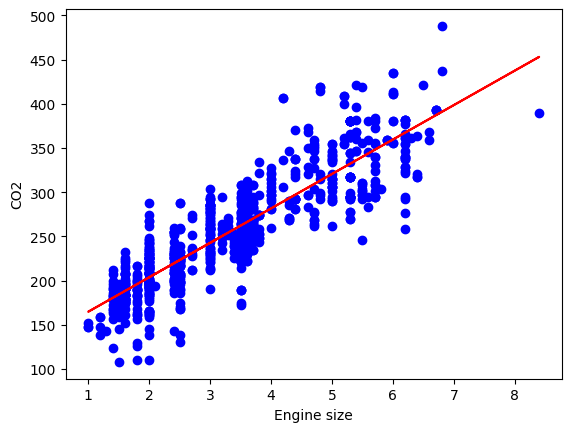

In [13]:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='blue')
plt.plot(x, reg.coef_[0][0]*x + reg.intercept_[0], '-r')
plt.xlabel('Engine size')
plt.ylabel('CO2')

In [14]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])   
predict = reg.predict(test_x)

print("MAE: ", "{:.2f}".format(np.mean(np.absolute(test_y - predict))))
print('R2_Score: ', "{:.2f}".format(r2_score(test_y, predict)))

MAE:  23.62
R2_Score:  0.76
